In [16]:
# for plotting
# import numpy as np
import matplotlib.pyplot as plt
def set_spines(ax):
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('axes', -0.1))
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['left'].set_position(('axes', -0.1))
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.
    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

# Ex 8.1 Pearson's $\chi^2$ test  

### Ex: $\chi^2$ Test for Goodness of Fit

The following data represents the observed frequencies of the number of photons emitted by a source in a given time interval (the frequency of detecting N photons tells you in how many time intervals the detector is hit exactly by N photons):


| Number of Photons | Observed Frequencies |
|-------------------|-------------|
| 0                 | 34          |
| 1                 | 33          |
| 2                 | 16          |
| 3                 | 10          |
| 4                 | 4           |
| 5                 | 2           |
| 6                 | 1           |


The expected frequencies for each category are based on a Poisson distribution with parameter $\lambda=1.2$, which represents the average number of photons emitted per time interval. Use the $\chi^2$ test for goodness of fit to determine whether the observed frequencies fit the expected Poisson distribution.

## 1.1
Generate the expected frequencies based on a Poisson distribution with $\lambda=1.2$.
Plot together the observed values and the expected ones.

What is the meaning of $\lambda$ for a Poisson distribution?


Hint: You can use scipy.stats.poisson.pmf for this.

In [17]:
import numpy as np
from scipy.stats import poisson, chisquare, chi2

# observed frequencies
obs = np.array([34, 33, 16, 10, 4, 2, 1])
x = np.linspace(0,6,7)
exp = poisson.pmf(x, 1.2)*100

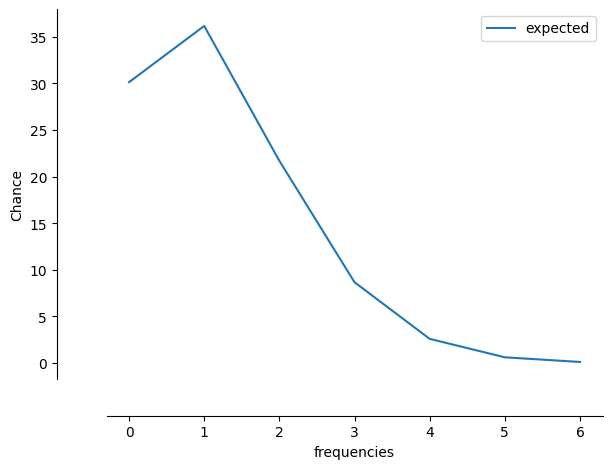

In [18]:
fig, ax = plt.subplots()
ax.plot(x,exp)
# ax.plot(x,obs)
ax.set_xlabel("frequencies")
ax.set_ylabel("Chance")
ax.legend(["expected", "observed"])
set_spines(ax)

Lambda gives the x-value where the poisson curve takes its maximum value.

## 1.2
Implement a function 'chi_square' and calculate the $\chi^2$ statistics using the observed and expected frequencies. Compare your results to the 'scipy.stats.chisquare' function.

The formula for the $\chi^2$ statistic is $\chi^2 = \sum_{i=1}^{N} \frac{(x_i - \mu_i)^2}{\mu_i}$, where $N$ is the number of categories, $x_i$ is the observed frequency, and $\mu_i$ is the expected frequency.

Important: Reweight the expected frequencies w.r.t. observed frequencies such that they sum to the total number of photon emitted (100): $\mu * \frac{\sum_{i=1}^{N} x_i}{\sum_{i=1}^{N} \mu_i}$. Otherwise 'scipy.stats.chisquare' might cause an error.


In [19]:
def chi_square(x, mu, N):
    temp = 0
    for i in range(N):
        temp += ((x[i]-mu[i])**2)/mu[i]
    return temp

In [20]:
w = sum(obs)/sum(exp)
expw = [i*w for i in exp]

own = chi_square(obs, expw, len(exp))
sci = chisquare(obs, expw)
print("Own: ", own, "\nSciPy: ", sci.statistic)

Own:  12.37402539496297 
SciPy:  12.37402539496297


## 1.3
Calculate the critical value for a significance level of 0.05 and decide whether the observed frequencies can match the Poisson distribution. 

scipy.stats.chisquare also outputs the p-value of the test. With which confidence can we reject the null hypothesis?

Hint: Use chi2.ppf() from scipy.stats to calculate the critical value. The degrees of freedom (df) for the $\chi^2$ test for goodness of fit are $\text{df} = N - 1$, where $N$ is the number of categories.

[30.11942119 36.14330543 21.68598326  8.6743933   2.60231799  0.62455632
  0.12491126]
3.3517855723067953
p value:  0.05412636987875064


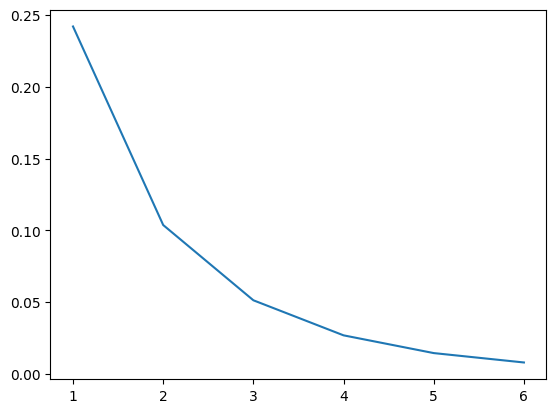

In [21]:
CV = 12.59
p = sci.pvalue

plt.plot(x, chi2.pdf(x, df=1))
print(exp)
temp = 0
for i in np.flip(x):
    if temp + exp[int(i)] <= 0.05*100:
        temp += exp[int(i)]
print(temp)
print("p value: ", sci.pvalue)
print("P value bigger than 0.05, thus accept Hypothesis.")

# Ex.8.2 Molecular Dynamics of Gold and Copper


In this exercise, you will analyze the structural information of a given material by using simple statistical tools.

The AuCu bi-layer is a two-dimensional (2-D) film. In the ground state ($\textit{i.e.}$, near null temperature, $T \sim 0$K), it shows a completely flat layer of Au atoms above a completely flat layer of Cu atoms (see the figure). At $T \sim 0$K, computational simulations (specifically, Density Functional Theory calculations) predict a value of $0.227$nm for the distance between the two layers. If the system is heated up, then atoms vibrate, changing the structural properties of the film (e.g., the layers are no longer completely flat).


On Moodle were uploaded, the results obtained by molecular dynamic simulations, which calculate the evolution in time (in steps of $1$fs) of the AuCu bi-layer at specific temperatures. The simulation of $6878$fs time-steps is divided in three numpy files:


- $\textrm{MD_AuCu_100k.npy}$,  $T \sim 100$K  with $500$fs steps,
- $\textrm{MD_AuCu_300k.npy}$,  $T \sim 300$K  with $1378$fs steps,
- $\textrm{MD_AuCu_300k_2.npy}$,  $T \sim 300$K  with $5000$fs steps.




Technical information which may help you and/or answer your most curious questions:
- The simulations include $50$ atoms of Cu and 50 atoms of Au.

- Periodic boundary conditions are applied ($\textit{i.e.}$, simulations of an infinitely large 2-D film).
- A rigid drift ($\textit{i.e.}$, the rigid translation) of the system along z occurs, but it is not physically relevant (there is nothing but the 2-D AuCu film in the simulation universe).

- Positions are expressed in Angström.
- The stored arrays have four indexes, the time (fs), the element type 0=Au/1=Cu, an index to identify the individual atom, and the three xyz coordinates .

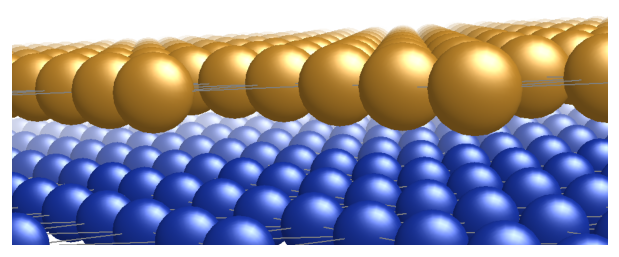

In [22]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize)

plt.figure(dpi=120)
plt.imshow(plt.imread('ex82_vmd.png'))
plt.axis('off')
plt.show()

## 2.1
Load the 3 files using Numpy, join the three arrays from the non strained simulations: the one at 100k, and the two at 300k. <br>
Scatter in a matplotlib 3Daxis plot the atoms' positions at time zero (the fist point in the 100k simulation) 

In [23]:
a = np.load("MD_AuCu_100k.npy")
b = np.load("MD_AuCu_300k.npy")
c = np.load("MD_AuCu_300k_2.npy")

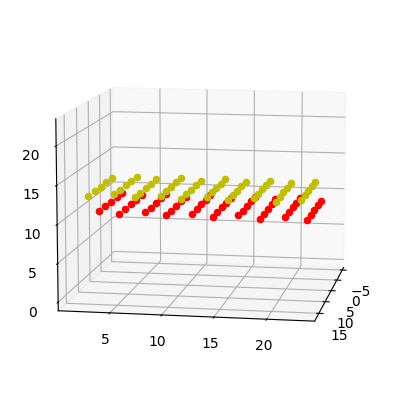

In [24]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')

for i in a[0,0]:
    x = i[0]
    y = i[1]
    z = i[2]
    ax.scatter(x,y,z, color = "y")
for i in a[0,1]:
    x = i[0]
    y = i[1]
    z = i[2]
    ax.scatter(x,y,z, color = "r")
set_axes_equal(ax)
ax.view_init(10, 10)


## 2.2
At every time step, calculate the average position along z of the Cu and Au layers, separately (averaged for all atoms of one type). Plot the data, 


In [25]:
avg_Au, avg_Cu = [], []
for i in range(a.shape[0]):
    avg_Au.append(np.mean(a[i,0,:,2]))
    avg_Cu.append(np.mean(a[i,1,:,2]))

print(avg_Au)
print(avg_Cu)

[12.274859999999999, 12.2750676, 12.275232000000003, 12.2753558, 12.275438800000002, 12.275484, 12.275490600000001, 12.275459399999999, 12.2753944, 12.275293399999999, 12.275160999999999, 12.274997, 12.274801800000002, 12.274579999999998, 12.2743308, 12.274057200000001, 12.2737594, 12.273436000000002, 12.2730908, 12.272720800000002, 12.2723292, 12.271915, 12.271482, 12.271027800000002, 12.270555, 12.270064, 12.269477199999999, 12.268873800000001, 12.268253999999999, 12.267617399999999, 12.266966199999999, 12.266299799999997, 12.265620600000002, 12.264928399999999, 12.2642246, 12.263509599999999, 12.262785599999999, 12.262053199999999, 12.261312799999999, 12.260568199999998, 12.259819599999998, 12.259067199999997, 12.258313800000002, 12.257557000000002, 12.256800199999997, 12.2560414, 12.255281, 12.254521399999998, 12.253763800000002, 12.2530076, 12.252253199999998, 12.2512414, 12.250233000000003, 12.249229799999998, 12.248231599999997, 12.2472402, 12.246256400000002, 12.245280000000001

## 2.3
At every time step, calculate the standard deviation of the z coordinate both for the Cu- and Au atoms, separately.


In [26]:
sig_Au, sig_Cu = [], []
for i in range(a.shape[0]):
    dev_Au, dev_Cu = 0, 0
    for j in a[i,0,:,2]:
        dev_Au += (j - avg_Au[i])**2
    for j in a[i,1,:,2]:
        dev_Cu += (j - avg_Cu[i])**2
    sig_Au.append(np.sqrt(dev_Au/a.shape[0]))
    sig_Cu.append(np.sqrt(dev_Cu/a.shape[0]))

print("sig_Au: ", sig_Au)
print("sig_Cu: ", sig_Cu)

sig_Au:  [0.0018056605439563183, 0.001885179202091939, 0.002029809252121976, 0.0022272032767576325, 0.0024631753197854336, 0.0027277314383934315, 0.0030124977284638715, 0.003311933417809018, 0.003622069638204098, 0.003939361298992559, 0.004261645750176824, 0.004587221217687259, 0.004914008941383832, 0.005241461704524792, 0.005568090546677583, 0.005893674983912805, 0.0062177013569324644, 0.006540167612531058, 0.006860831548434911, 0.007179304725110893, 0.007496113362003001, 0.007810065844792869, 0.008122014823921492, 0.008430539776076032, 0.008735271655764345, 0.009036219519245835, 0.009378603031155525, 0.009716523614750294, 0.01004958659846264, 0.010377995583155745, 0.010700936555087139, 0.011018668422091666, 0.011331730395839786, 0.011639022267527435, 0.011940981386971476, 0.012237688490233718, 0.012528018952092929, 0.012812027527912974, 0.013089640469317744, 0.013360125369022575, 0.013623131254744635, 0.013878374617223731, 0.014125815174920007, 0.014365393990420106, 0.014597939957267

## 2.4
Calculate the average distance between the Au and Cu layers.

In [27]:
avg_dist = np.mean([avg_Au[i]- avg_Cu[i] for i in range(len(avg_Au))])

print(avg_dist)

2.2461012596


## 2.5
Plot in a graph including the average distance (from task 4), and the standard deviations of Cu and Au atoms (from task 3), as functions of time. 

Text(0, 0.5, 'Standard deviation')

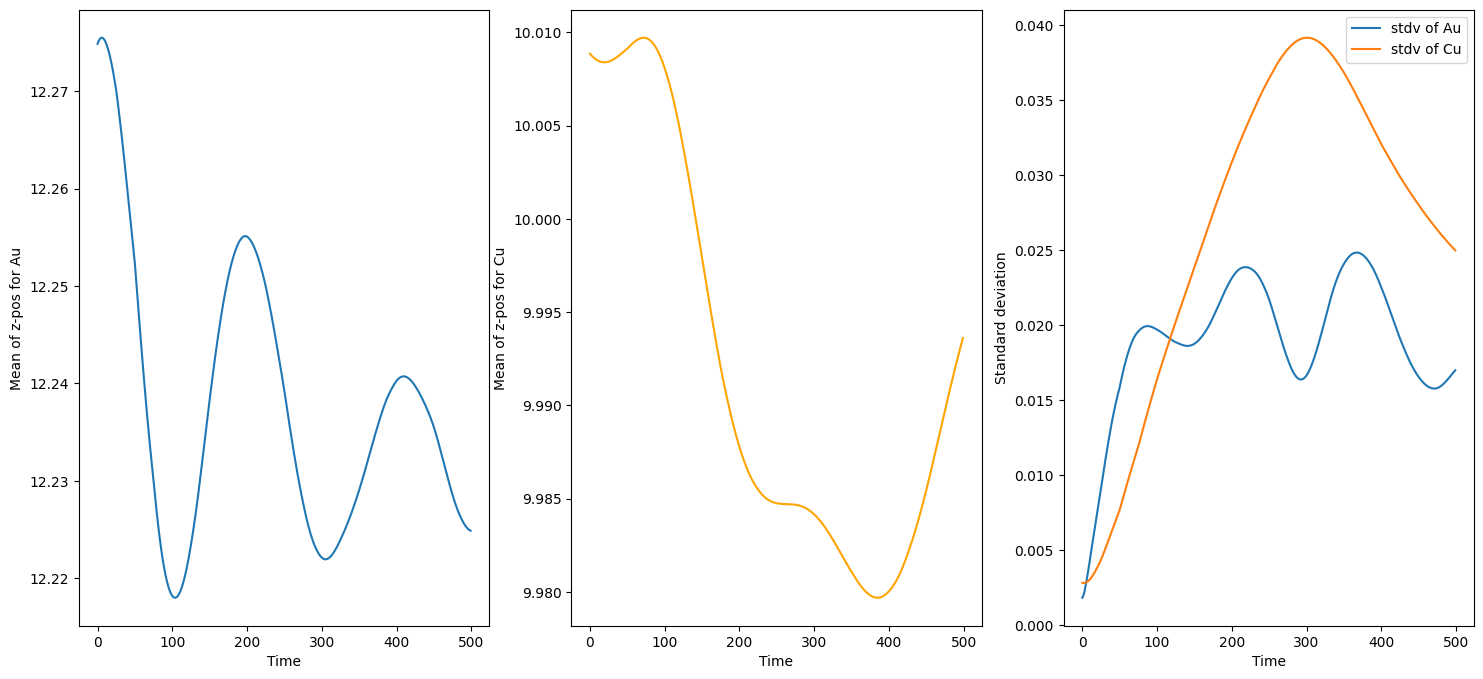

In [28]:
t = np.arange(a.shape[0])

fig, ax = plt.subplots(1,3, figsize=(18,8))
ax[0].plot(t,avg_Au)
ax[1].plot(t,avg_Cu, color = "orange")
ax[2].plot(t,sig_Au)
ax[2].plot(t,sig_Cu)
ax[2].legend(["stdv of Au", "stdv of Cu"])
for i in range(3):
    ax[i].set_xlabel("Time")
ax[0].set_ylabel("Mean of z-pos for Au")
ax[1].set_ylabel("Mean of z-pos for Cu")
ax[2].set_ylabel("Standard deviation")

## 2.6.

For the three simulations average over time the distance between the two layers and the standard deviations of the two layers. 
Print the data and comment the effects of raising the temperature from $100$K to $300$K .


In [29]:
dist_t = []
sig_Au_t = []
sig_Cu_t = []

aaa = a
bbb = b
ccc = c

firstavg_Au, firstavg_Cu = [], []
for j in range(aaa.shape[0]):
    firstavg_Au.append(np.mean(aaa[j,0,:,2]))
    firstavg_Cu.append(np.mean(aaa[j,1,:,2]))
    firstavg_dist = np.mean([firstavg_Au[j]- avg_Cu[j] for k in range(len(firstavg_Au))])

firstsig_Au, firstsig_Cu = [], []
for i in range(aaa.shape[0]):
    firstdev_Au, firstdev_Cu = 0, 0
    for j in aaa[i,0,:,2]:
        firstdev_Au += (j - firstavg_Au[i])**2
    for j in aaa[i,1,:,2]:
        firstdev_Cu += (j - avg_Cu[i])**2
    firstsig_Au.append(np.sqrt(firstdev_Au/aaa.shape[0]))
    firstsig_Cu.append(np.sqrt(firstdev_Cu/aaa.shape[0]))

dist_t.append(firstavg_dist)
sig_Au_t.append(np.mean(firstsig_Au))
sig_Cu_t.append(np.mean(firstsig_Cu))

secondavg_Au, secondavg_Cu = [], []
for j in range(bbb.shape[0]):
    secondavg_Au.append(np.mean(bbb[j,0,:,2]))
    secondavg_Cu.append(np.mean(bbb[j,1,:,2]))
    secondavg_dist = np.mean([secondavg_Au[j]- secondavg_Cu[j] for k in range(len(secondavg_Au))])

secondsig_Au, secondsig_Cu = [], []
for i in range(a.shape[0]):
    seconddev_Au, seconddev_Cu = 0, 0
    for j in bbb[i,0,:,2]:
        seconddev_Au += (j - secondavg_Au[i])**2
    for j in bbb[i,1,:,2]:
        seconddev_Cu += (j - avg_Cu[i])**2
    secondsig_Au.append(np.sqrt(seconddev_Au/a.shape[0]))
    secondsig_Cu.append(np.sqrt(seconddev_Cu/a.shape[0]))

dist_t.append(secondavg_dist)
sig_Au_t.append(np.mean(secondsig_Au))
sig_Cu_t.append(np.mean(secondsig_Cu))

thirdavg_Au, thirdavg_Cu = [], []
for j in range(ccc.shape[0]):
    thirdavg_Au.append(np.mean(ccc[j,0,:,2]))
    thirdavg_Cu.append(np.mean(ccc[j,1,:,2]))
    thirdavg_dist = np.mean([thirdavg_Au[j]- thirdavg_Cu[j] for k in range(len(thirdavg_Au))])

thirdsig_Au, thirdsig_Cu = [], []
for i in range(ccc.shape[0]):
    thirddev_Au, thirddev_Cu = 0, 0
    for j in ccc[i,0,:,2]:
        thirddev_Au += (j - thirdavg_Au[i])**2
    for j in ccc[i,1,:,2]:
        thirddev_Cu += (j - thirdavg_Cu[i])**2
    thirdsig_Au.append(np.sqrt(thirddev_Au/a.shape[0]))
    thirdsig_Cu.append(np.sqrt(thirddev_Cu/a.shape[0]))

dist_t.append(thirdavg_dist)
sig_Au_t.append(np.mean(thirdsig_Au))
sig_Cu_t.append(np.mean(thirdsig_Cu))


print("dist_t: ", dist_t)
print("sig_Au_t: ", sig_Au_t)
print("sig_Cu_t: ", sig_Cu_t)

dist_t:  [2.2312708000000008, 2.2646221999999994, 2.1812671999999993]
sig_Au_t:  [0.018897301982456, 0.04157118640504816, 0.09505601198191833]
sig_Cu_t:  [0.02652352624716533, 0.06670871811588631, 0.17686720513681098]


## 2.7
Summarize your results of average distance and standard deviation in a pandas DataFrame

In [30]:
none1 = []
for i in range(4500):
    none1.append(None)
none2 = []
for i in range(3622):
    none2.append(None)

firstavg_Au = firstavg_Au + none1
secondavg_Au = secondavg_Au + none2
firstsig_Au = firstsig_Au + none1
secondsig_Au = secondsig_Au + none1
firstavg_Cu = firstavg_Cu + none1
secondavg_Cu = secondavg_Cu + none2
firstsig_Cu = firstsig_Cu + none1
secondsig_Cu = secondsig_Cu + none1

print(len(firstsig_Au), len(secondsig_Au), len(thirdsig_Au))

data = {'avg z of Au at 100K':firstavg_Au, 'avg z of Cu at 100K':firstavg_Cu, 'avg z of Au at 300K':secondavg_Au, \
        'avg z of Cu at 300K':secondavg_Au, 'avg z of Au at 300K_2':thirdavg_Au, 'avg z of Cu at 300K_2':thirdavg_Cu, \
        'avg z of Au at 100K':firstsig_Au, 'sig z of Cu at 100K':firstsig_Cu, 'sig z of Au at 300K':secondsig_Au, \
        'sig z of Cu at 300K':secondsig_Au, 'sig z of Au at 300K_2':thirdsig_Au, 'sig z of Cu at 300K_2':thirdsig_Cu}

df = pd.DataFrame(data)
df

5000 5000 5000


,avg z of Au at 100K,avg z of Cu at 100K,avg z of Au at 300K,avg z of Cu at 300K,avg z of Au at 300K_2,avg z of Cu at 300K_2,sig z of Cu at 100K,sig z of Au at 300K,sig z of Cu at 300K,sig z of Au at 300K_2,sig z of Cu at 300K_2
0,0.001806,10.008860,12.224849,12.224849,12.229595,10.004680,0.002802,0.017033,0.017033,0.033074,0.073868
1,0.001885,10.008812,12.224825,12.224825,12.229364,10.004784,0.002790,0.017085,0.017085,0.033132,0.074023
2,0.002030,10.008767,12.224810,12.224810,12.229127,10.004891,0.002786,0.017135,0.017135,0.033191,0.074179
3,0.002227,10.008726,12.224803,12.224803,12.228888,10.004999,0.002790,0.017182,0.017182,0.033250,0.074334
4,0.002463,10.008687,12.224804,12.224804,12.228646,10.005108,0.002801,0.017225,0.017225,0.033310,0.074489
...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,NaN,NaN,NaN,11.766177,9.583151,NaN,NaN,NaN,0.089765,0.174938
4996,NaN,NaN,NaN,NaN,11.765770,9.583188,NaN,NaN,NaN,0.089722,0.175018
4997,NaN,NaN,NaN,NaN,11.765365,9.583225,NaN,NaN,NaN,0.089678,0.175098
4998,NaN,NaN,NaN,NaN,11.764964,9.583261,NaN,NaN,NaN,0.089632,0.175178
